# !!THE SPARKS FOUNDATION GRIP PROGRAM (OCTOBER-2021)!!

**DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP**

**NAME- PRIYA KALIDAS PAWAR**

**PROBLEM STATEMENT-PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NO. OF STUDY HOURS**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv('Student_scores.csv')

In [3]:
df.head()

,Hours,Marks
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**EXPLORATORY DATA ANALYSIS**

In [5]:
df.columns

Index(['Hours', 'Marks'], dtype='object')

In [6]:
df.dtypes

Hours    float64
Marks      int64
dtype: object

In [7]:
df.info

<bound method DataFrame.info of    Hours  Marks
0    2.5     21
1    5.1     47
2    3.2     27
3    8.5     75
4    3.5     30>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   5 non-null      float64
 1   Marks   5 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [9]:
df.describe()

,Hours,Marks
count,5.000000,5.000000
mean,4.560000,40.000000
std,2.399583,21.817424
min,2.500000,21.000000
25%,3.200000,27.000000
50%,3.500000,30.000000
75%,5.100000,47.000000
max,8.500000,75.000000


In [10]:
df.corr()

,Hours,Marks
Hours,1.000000,0.998515
Marks,0.998515,1.000000


**OUTLIER REMOVAL**

In [11]:
def null_detection(df):
    num_cols = []
    count=0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            t.append(j)
            count+=1
    df = df.drop(list(set(t)))
    df = df.reset_index()
    df = df.drop('index' , axis=1)
    print(count)
    return df

In [12]:
df = null_detection(df)

0


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


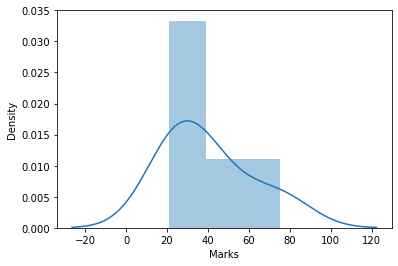

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


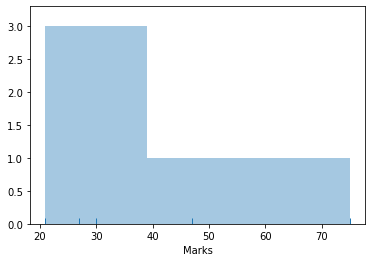

In [14]:
sns.distplot(df['Marks'])
plt.show()

sns.distplot(df['Marks'] , kde=False, rug=True)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'JointGrid' object has no attribute 'annotate'

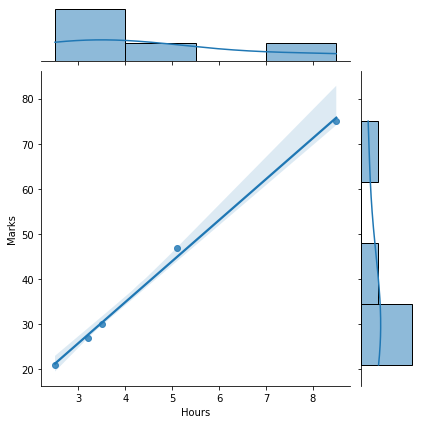

In [15]:
sns.jointplot(df['Hours'], df['Marks'], kind = "reg").annotate(stats.pearsonr)
plt.show

**PERFORMING SIMPLE LINEAR REGRESSION**

**Calculating the coefficients of the simple linear regression equation: y=B0+B1.x(B1:Slope, B0:Intercept)**

In [16]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Marks'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Marks'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [17]:
B1

9.078673150399444

In [18]:
B0 = mean_y - B1*mean_x

In [19]:
B0

-1.3987495658214684

**MAKING PREDICTIONS**

In [20]:
df['predicted_scores'] = B0 + B1*df['Hours']

In [21]:
df.head()

,Hours,Marks,predicted_scores
0,2.5,21,21.297933
1,5.1,47,44.902484
2,3.2,27,27.653005
3,8.5,75,75.769972
4,3.5,30,30.376606


[]

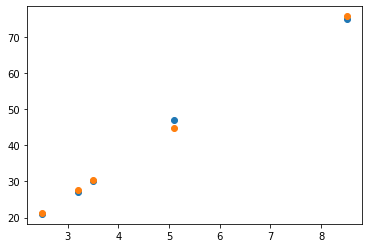

In [22]:
plt.scatter(df['Hours'], df['Marks'])
plt.scatter(df['Hours'], df['predicted_scores'])
plt.plot()



 **Prediction of given value: 9.25**

In [23]:
B0 + B1*9.25

82.57897707537339

In [24]:
y = list(df['Marks'].values)
y_pred = list(df['predicted_scores'].values)

**RMSE**

In [25]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [26]:
rmse

0.026574057489110098

#**Additional conclusions**

In [30]:
# consider a threshold to come to a conclusion whether the student passed or not!
#Let's consider here 40 as a cut off to pass.
cut_off = 40

In [31]:
df['Passed?'] = df['Marks']>=40

In [32]:
df.head()

,Hours,Marks,predicted_scores,Passed?
0,2.5,21,21.297933,False
1,5.1,47,44.902484,True
2,3.2,27,27.653005,False
3,8.5,75,75.769972,True
4,3.5,30,30.376606,False


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Passed?', ylabel='count'>

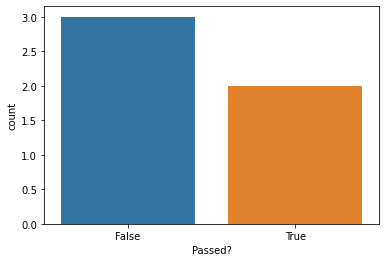

In [33]:
sns.countplot(df['Passed?'])

**Feauture Engineering**

In [34]:
feature = df['Hours'].values.reshape(-1, 1)
target = df['Passed?'].values